# How does vulnerability differ over time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Over 24 hours

In [2]:
cities = ['Den Haag', 'Rotterdam', 'Amsterdam']
data = {}
for i, city in enumerate(cities):
    time_step = 1
    df = pd.read_csv(f'../data/processed/p2000/{city}/spatiotemporal_grid_time_step={time_step}.csv')
    df.drop(columns=['c28992r1000', 'aantal_inwoners', 'Total', 'geometry'], inplace=True)
    df = df.sum()
    data[city] = df

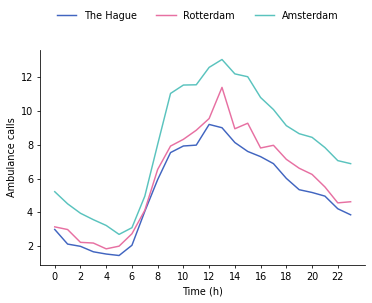

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
colors = {'Den Haag' : '#4165c0',  'Rotterdam' : '#e770a2', 'Amsterdam' : '#5ac3be'}
labels = ['The Hague', 'Rotterdam', 'Amsterdam']
for i, city in enumerate(cities):
    data[city].plot(ax=ax, color=colors[city], label=labels[i], kind='line')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('Ambulance calls')
    ax.set_xticks(np.arange(0, 24, 2))
    ax.set_xticklabels(np.arange(0, 24, 2))
labels, handles = ax.get_legend_handles_labels()
fig.legend(labels, handles, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False);
plt.savefig(f'../report/figures/fig1.png', dpi=300, bbox_inches='tight')

## Over six four-hour bins

In [4]:
cities = ['Den Haag', 'Rotterdam', 'Amsterdam']
data = {}
for i, city in enumerate(cities):
    time_step = 4
    df = pd.read_csv(f'../data/processed/p2000/{city}/spatiotemporal_grid_time_step={time_step}.csv')
    df.drop(columns=['c28992r1000', 'aantal_inwoners', 'Total', 'geometry'], inplace=True)
    df = df.sum()
    data[city] = df

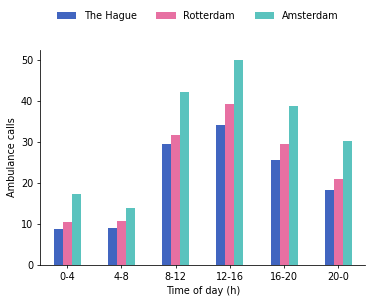

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
df = pd.DataFrame(data)
df.rename({'Den Haag': 'The Hague'}, axis=1, inplace=True)
df.plot.bar(ax=ax, rot=0, color=[colors[city] for city in cities], legend=False)
xticklabels = ['0-4', '4-8', '8-12', '12-16', '16-20', '20-0']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time of day (h)')
ax.set_xticklabels(xticklabels)
ax.set_ylabel('Ambulance calls')
labels, handles = ax.get_legend_handles_labels()
fig.legend(labels, handles, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)
plt.savefig(f'../report/figures/appendix/sfig6.png', dpi=300, bbox_inches='tight')